# Brat annotation tool and guidelines

1. Originally brat is hosted here
https://brat.nlplab.org
2. There are two useful docker configurations with brat
https://github.com/cassj/brat-docker This configuration is used for this project
https://github.com/ddevaraj/docker-brat
3. https://zenodo.org/record/4574199 The detailed annotation guideline is provided here
4. https://brat.nlplab.org/manual.html Brat usage documentation


An annotation example of brat usage

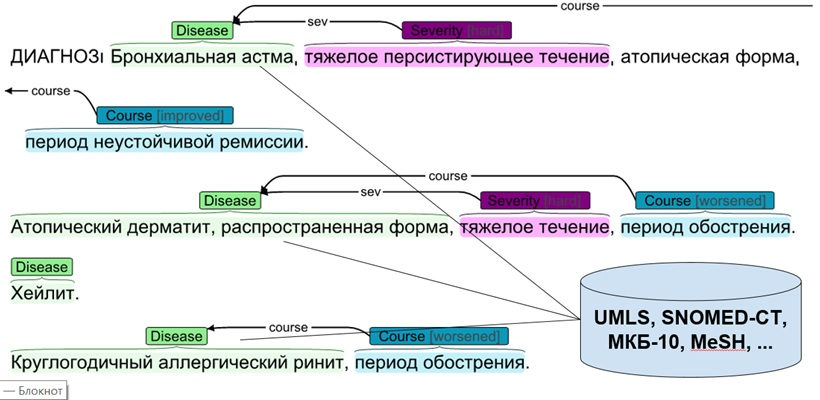

In [1]:
from IPython.display import Image
Image(filename='Example.jpg')

# Code to convert brat files to csv
# Only path with brat entities is required to provide. 

## Imports
In case of the import mistake, manually fix paths
Known for Mac/Windows

In [3]:
import os
from re import finditer
import pandas as pd
from brat_tools.format_brat import load_brat_annotation_file
import re

## Select path with files, created by brat

In [5]:
path = '../../../../brat_data/Annotation_10.5.21/'
values_to_extract = ['hypertension']


## Python methods

In [6]:

def id_selector(file):
    file = file.split('.ann')[0]
    file = file.split('/')[-1]
    return file

def brat_prosessing(brat_data, file):
    df = pd.DataFrame(columns=['doc_id','entity_idx','span','entity_name','file_path'])
    for i in range(0,len(brat_data[0])):
        brat_list = (str(brat_data[0][i]).split('\t'))
        tags_spans = brat_list[1].split(' ',1)
        df = df.append({'doc_id': id_selector(file), 'entity_idx':brat_list[0], 'disease_tag' : tags_spans[0],
                        'span':tags_spans[1], 'entity_name':brat_list[2], 'file_path' : file}, ignore_index=True)
    return df

def binarization(disease_list, list_non_binar, values_to_extract):
    some_dict = {'coronary_artery_dis':0,
                 'fibrillation':0,
                 'parox_fibril':0,
                 'sys_thromb_emb':0,
     'hypertension':0,
     'peripheral_artery_dis':0,
     'valvular_dis':0,
     'heart_failure':0,
     'diabetes':0,
     'stroke':0,
     'tia':0,
     'sinus_rythm':0,
       "AV1" : 0,
                'tyroid':0}
    for value in disease_list:
        if value in some_dict.keys():
            some_dict[value] = 1        
    
    for idx, value in enumerate(disease_list):
        if value in values_to_extract:
            some_dict[str(value)+'_real'] = list_non_binar[idx]
    return some_dict



## Loop for loading data

In [7]:
df = pd.DataFrame(columns=['doc_id','entity_idx','span','entity_name'])
for r, d, f in os.walk(path):
    for file in f:
        #print(path)
        if '.ann' in file:
            file_path = os.path.join(r, file)
            brat_data = load_brat_annotation_file(file_path)
            new_df = brat_prosessing(brat_data, file_path)
            df = df.append(new_df,ignore_index=True,sort = False)

In [8]:
df['disease_tag'].unique()

array(['hypertension', 'sinus_rythm', 'coronary_artery_dis', 'drug',
       'peripheral_artery_dis', 'diabetes', 'LP', 'fibrillation',
       'heart_failure', 'parox_fibril', 'stroke', 'tia', 'valvular_dis',
       'SBP', 'DBP', 'LAvol', 'LV_EF', 'LVH', 'creat', 'Hb', 'HR', 'WBC',
       'K_pos_Level', 'Gluc', 'TG', 'Choles', 'SVE', 'CABG', 'dia_dysf',
       'LDL', 'PAD2', 'MPP', 'PulHyp', 'AV1', 'drug2', 'LVHm', 'MI',
       'PCI', 'tyroid', 'COPD', 'PE', 'SOAS', 'SVT', 'lipid',
       'sys_thromb_emb'], dtype=object)

In [9]:
df.head()

,doc_id,entity_idx,span,entity_name,file_path,disease_tag
0,126162_31714,T1,561 584,Артериальная гипертония,../../../../brat_data/Annotation_27.9.20/annot...,hypertension
1,126162_31714,T2,7399 7420,Синусовая брадикардия,../../../../brat_data/Annotation_27.9.20/annot...,sinus_rythm
2,123664_54363,T1,398 421,Артериальная гипертония,../../../../brat_data/Annotation_27.9.20/annot...,hypertension
3,123664_54363,T2,554 581,Ишемическая болезнь сердца,../../../../brat_data/Annotation_27.9.20/annot...,coronary_artery_dis
4,123664_54363,T3,651 727,Транслюминальная баллонная ангиопластика со ст...,../../../../brat_data/Annotation_27.9.20/annot...,coronary_artery_dis


# Method for splitting entities and for adding exact values

In [10]:
def data_obtainer(df):
    result = {}
    values = ['hypertension', 'sinus_rythm', 'coronary_artery_dis', 'drug',
           'peripheral_artery_dis', 'diabetes', 'LP', 'fibrillation',
           'heart_failure', 'parox_fibril', 'stroke', 'tia', 'valvular_dis',
           'sys_thromb_emb', 'AV1', 'SBP', 'DBP', 'tyroid']
    for value in values:
        result[value] = 0
    for value in values:
        result[value+'_real'] = None
    list_bin = df['disease_tag'].values
    list_values = df['entity_name'].values
    #result['file_path'] = df["file_path"]
    for item_1, item_2 in zip(list_bin,list_values):
        result[item_1] = 1
        result[item_1+'_real'] = item_2
    return result

In [11]:
values = ['hypertension', 'sinus_rythm', 'coronary_artery_dis', 'drug',
           'peripheral_artery_dis', 'diabetes', 'LP', 'fibrillation',
           'heart_failure', 'parox_fibril', 'stroke', 'tia', 'valvular_dis',
           'sys_thromb_emb', 'AV1', 'SBP', 'DBP', 'tyroid']
all_values = [value +'_real' for value in values]
all_values = values + all_values

In [12]:
df_full = pd.DataFrame(columns = all_values)
s = df['doc_id'].unique()
for value in s:
    df_to_check = df[df['doc_id']==value]
    rez = data_obtainer(df_to_check)
    rez['doc_id'] = value
    rez['file_path'] = df_to_check['file_path'].iat[0]
    df_full = df_full.append(rez,ignore_index=True)

df_full is completed dataframe with brat entities

## Brat hyperlink creation

In [13]:
def correcter(file_path):
    new_path = file_path.replace('../../../../brat_data/Annotation_13_2/','http://)
    new_path = new_path.replace('.ann','')
    return new_path
df_full['http'] =  df_full["file_path"].apply(correcter)
